# Airline Passenger Satisfaction
### Team Members: Diana Dalenova, Shyngys Kapezov, Zhanna Balgabayeva

#### Dataset: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction?select=test.csv

In [1]:
#pip install missingno

In [2]:
#pip install imblearn

## Importing libraries

In [3]:
import missingno as msno
from sklearn import metrics
import numpy as np
import pandas as pd
import math
import csv
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score

## Data preparation

In [4]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')
df1

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

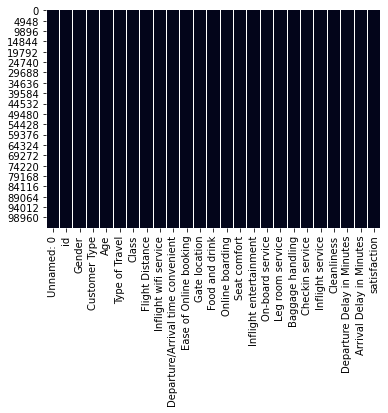

In [5]:
sns.heatmap(df1.isnull(), cbar=False)
df1.isnull().sum()

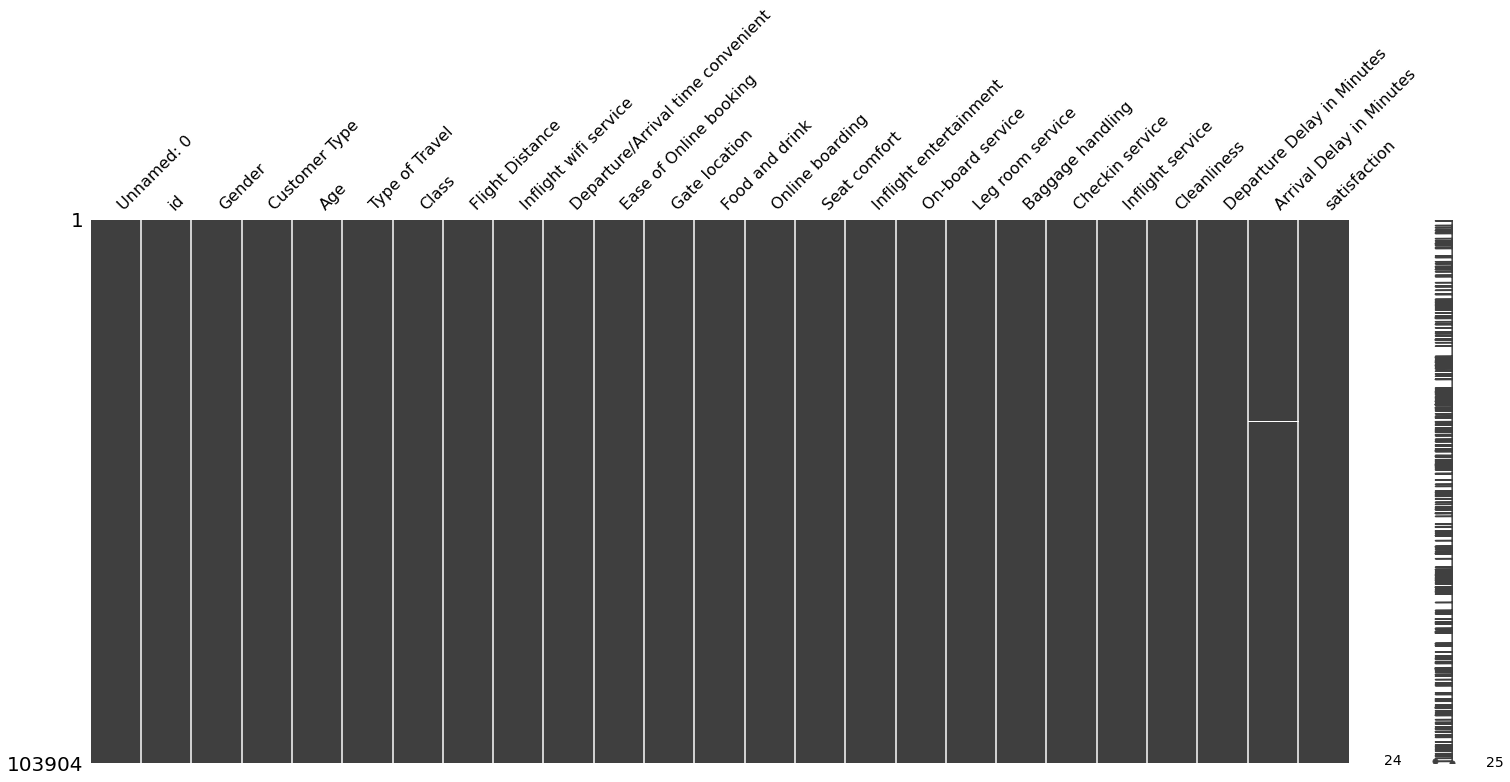

In [6]:
msno.matrix(df1)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
print('Shape of the train set: ',df1.shape)
print('Shape of the test set: ',df2.shape)

Shape of the train set:  (103904, 25)
Shape of the test set:  (25976, 25)


In [9]:
df1['satisfaction'] = df1['satisfaction'].str.replace('satisfied','1')
df1['satisfaction'] = df1['satisfaction'].str.replace('neutral or dissatisfied','0')
df1['satisfaction'] = df1['satisfaction'].str.replace('neutral or dis1','0')
df1['satisfaction'] = df1['satisfaction'].astype(int)

In [10]:
df1.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [11]:
df1 = df1.drop(["Unnamed: 0","id"], axis=1)
df1=df1.dropna()

In [12]:
#checking dublicates
print('Number of dublicates in train set:', len(df1)-len(df1.drop_duplicates()))

Number of dublicates in train set: 0


In [13]:
df2 = df2.drop(["Unnamed: 0","id"], axis=1)
df2=df2.dropna()
print('Number of dublicates in test set:', len(df2)-len(df2.drop_duplicates()))

Number of dublicates in test set: 0


#### Correlation matrix

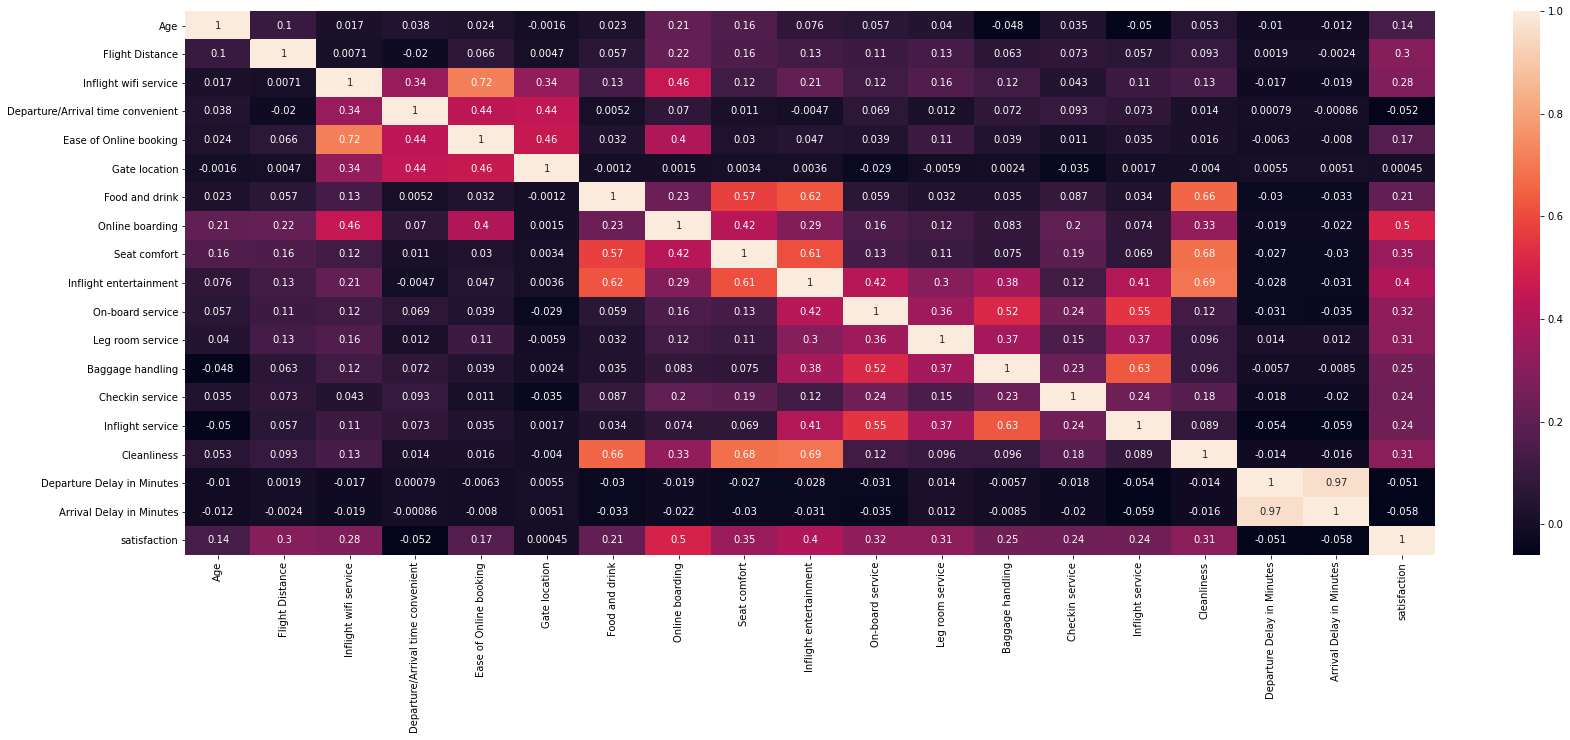

In [14]:
plt.figure(figsize=(28,10))
corrMatrix=df1.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [15]:
df1.groupby(['Gender'])['satisfaction'].count()

Gender
Female    52576
Male      51018
Name: satisfaction, dtype: int64

In [16]:
df2['satisfaction'] = df2['satisfaction'].str.replace('satisfied','1')
df2['satisfaction'] = df2['satisfaction'].str.replace('neutral or dissatisfied','0')
df2['satisfaction'] = df2['satisfaction'].str.replace('neutral or dis1','0')
df2['satisfaction'] = df2['satisfaction'].astype(int)

In [17]:
#let's do the same with other columns

In [18]:
df2['Gender'] = df2['Gender'].str.replace('Male','0')
df2['Gender'] = df2['Gender'].str.replace('Female','1')
df2['Gender'] = df2['Gender'].astype(int)
df1['Gender'] = df1['Gender'].str.replace('Male','0')
df1['Gender'] = df1['Gender'].str.replace('Female','1')
df1['Gender'] = df1['Gender'].astype(int)

In [19]:
df1['Customer Type'] = df1['Customer Type'].str.replace('Loyal Customer','1')
df1['Customer Type'] = df1['Customer Type'].str.replace('disloyal Customer','0')
df1['Customer Type'] = df1['Customer Type'].astype(int)
df2['Customer Type'] = df2['Customer Type'].str.replace('Loyal Customer','1')
df2['Customer Type'] = df2['Customer Type'].str.replace('disloyal Customer','0')
df2['Customer Type'] = df2['Customer Type'].astype(int)

In [20]:
df1.groupby(['Class'])['satisfaction'].count()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: satisfaction, dtype: int64

In [21]:
df1['Class'] = df1['Class'].str.replace('Eco Plus','1')
df1['Class'] = df1['Class'].str.replace('Eco','0')
df1['Class'] = df1['Class'].str.replace('Business','2')
df1['Class'] = df1['Class'].astype(int)
df2['Class'] = df2['Class'].str.replace('Eco Plus','1')
df2['Class'] = df2['Class'].str.replace('Eco','0')
df2['Class'] = df2['Class'].str.replace('Business','2')
df2['Class'] = df2['Class'].astype(int)

In [22]:
df1.groupby(['Type of Travel'])['satisfaction'].count()

Type of Travel
Business travel    71465
Personal Travel    32129
Name: satisfaction, dtype: int64

In [23]:
df1['Type of Travel'] = df1['Type of Travel'].str.replace('Business travel','1')
df1['Type of Travel'] = df1['Type of Travel'].str.replace('Personal Travel','0')
df1['Type of Travel'] = df1['Type of Travel'].astype(int)

df2['Type of Travel'] = df2['Type of Travel'].str.replace('Business travel','1')
df2['Type of Travel'] = df2['Type of Travel'].str.replace('Personal Travel','0')
df2['Type of Travel'] = df2['Type of Travel'].astype(int)

In [24]:
X_train = df1.drop("satisfaction", axis=1)
Y_train = df1["satisfaction"]
X_test  = df2.drop("satisfaction", axis=1)
Y_test = df2["satisfaction"]

In [25]:
print('Y_train:\n', Y_train.value_counts())
print('Y_test: \n', Y_test.value_counts())

Y_train:
 0    58697
1    44897
Name: satisfaction, dtype: int64
Y_test: 
 0    14528
1    11365
Name: satisfaction, dtype: int64


Data preparation part is done. Null values were dropped, no dublicates were found. Some column values were converted to integers for the future prediction. Furthermore, train and test values were created. By the above cell, it can be said that the dataset is balanced.

## Feature selection 

In [26]:
#We want to show feature importance score by using RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
y_pred1=clf.predict(X_train)
y_pred=clf.predict(X_test)
print("Accuracy of train:",metrics.accuracy_score(Y_train, y_pred1))
print("Accuracy of test:",metrics.accuracy_score(Y_test, y_pred))

Accuracy of train: 1.0
Accuracy of test: 0.9632333062989997


In [27]:
try1 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
conf_matrix = confusion_matrix(Y_test, y_pred).T
conf_matrix = pd.DataFrame(conf_matrix, 
                           index=[" Predicted NO", " Predicted YES"],
                           columns=[" True NO", " True YES"])
print(conf_matrix)
print(classification_report(Y_test, y_pred, target_names=['No', 'Yes']))

                 True NO   True YES
 Predicted NO      14219        643
 Predicted YES       309      10722
              precision    recall  f1-score   support

          No       0.96      0.98      0.97     14528
         Yes       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



In [28]:
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Inflight wifi service                0.153469
Online boarding                      0.153007
Class                                0.101542
Type of Travel                       0.094970
Inflight entertainment               0.065516
Seat comfort                         0.053123
Leg room service                     0.039781
Flight Distance                      0.038823
Customer Type                        0.036495
Ease of Online booking               0.036340
Age                                  0.031046
On-board service                     0.031007
Cleanliness                          0.025904
Checkin service                      0.023138
Baggage handling                     0.022870
Inflight service                     0.021773
Gate location                        0.016223
Departure/Arrival time convenient    0.016098
Arrival Delay in Minutes             0.012231
Food and drink                       0.011348
Departure Delay in Minutes           0.010870
Gender                            

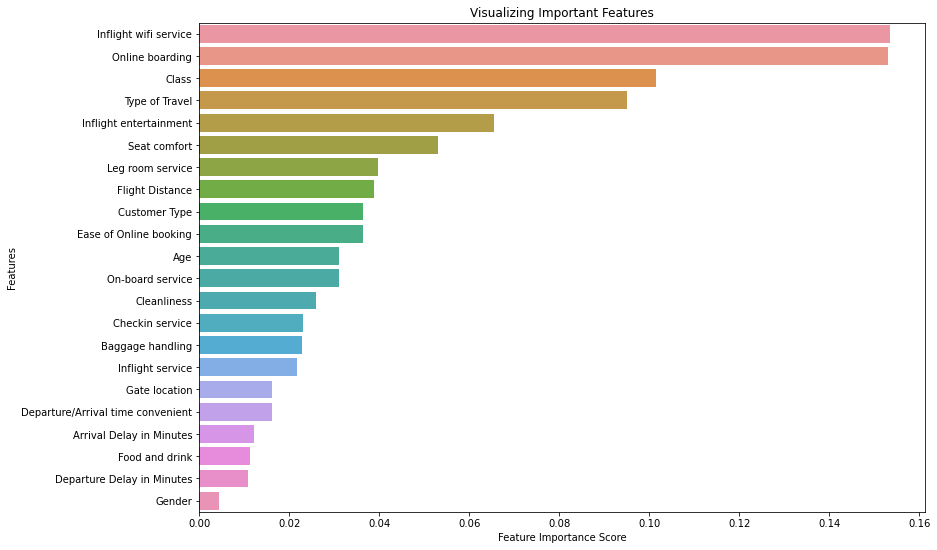

In [29]:
plt.figure(figsize=(13,9))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

plt.show()

In [30]:
#we found that dropping 5 features was the most optimal option
df3 = df1.drop(["Gender","Ease of Online booking","Food and drink","Departure/Arrival time convenient","Departure Delay in Minutes"], axis=1)
df4 = df2.drop(["Gender","Ease of Online booking","Food and drink","Departure/Arrival time convenient","Departure Delay in Minutes"], axis=1)

X_train = df3.drop("satisfaction", axis=1)
Y_train = df3["satisfaction"]
X_test  = df4.drop("satisfaction", axis=1)
Y_test = df4["satisfaction"]

## Data modelling

#### Random Forest Classifier

In [31]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)
rfc_accuracy = metrics.accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred, average='weighted')
print("Accuracy:",rfc_accuracy)

Accuracy: 0.9632333062989997


In [32]:
try2 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
conf_matrix = confusion_matrix(Y_test, y_pred).T
conf_matrix = pd.DataFrame(conf_matrix, 
                           index=[" Predicted NO", " Predicted YES"],
                           columns=[" True NO", " True YES"])
print(conf_matrix)
print(classification_report(Y_test, y_pred, target_names=['No', 'Yes']))

                 True NO   True YES
 Predicted NO      14227        651
 Predicted YES       301      10714
              precision    recall  f1-score   support

          No       0.96      0.98      0.97     14528
         Yes       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



#### Ada Boost Classifier

In [33]:
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
model = abc.fit(X_train, Y_train)

y_pred = model.predict(X_test)
f2 = f1_score(Y_test, y_pred, average='weighted')
abc_accuracy = metrics.accuracy_score(Y_test, y_pred)
print("Accuracy:",abc_accuracy)

Accuracy: 0.9265438535511529


In [34]:
try3 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
conf_matrix = confusion_matrix(Y_test, y_pred).T
conf_matrix = pd.DataFrame(conf_matrix, 
                           index=[" Predicted NO", " Predicted YES"],
                           columns=[" True NO", " True YES"])
print(conf_matrix)
print(classification_report(Y_test, y_pred, target_names=['No', 'Yes']))

                 True NO   True YES
 Predicted NO      13675       1049
 Predicted YES       853      10316
              precision    recall  f1-score   support

          No       0.93      0.94      0.93     14528
         Yes       0.92      0.91      0.92     11365

    accuracy                           0.93     25893
   macro avg       0.93      0.92      0.93     25893
weighted avg       0.93      0.93      0.93     25893



#### Decision Tree Classifier

In [35]:
dtc = DecisionTreeClassifier(random_state=0)
model = dtc.fit(X_train, Y_train)
y_pred = model.predict(X_test)
dtc_accuracy = metrics.accuracy_score(Y_test, y_pred)
f3 = f1_score(Y_test, y_pred, average='weighted')
print("Accuracy:",dtc_accuracy)

Accuracy: 0.9471285675665237


In [36]:
try4 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
conf_matrix = confusion_matrix(Y_test, y_pred).T
conf_matrix = pd.DataFrame(conf_matrix, 
                           index=[" Predicted NO", " Predicted YES"],
                           columns=[" True NO", " True YES"])
print(conf_matrix)
print(classification_report(Y_test, y_pred, target_names=['No', 'Yes']))

                 True NO   True YES
 Predicted NO      13834        675
 Predicted YES       694      10690
              precision    recall  f1-score   support

          No       0.95      0.95      0.95     14528
         Yes       0.94      0.94      0.94     11365

    accuracy                           0.95     25893
   macro avg       0.95      0.95      0.95     25893
weighted avg       0.95      0.95      0.95     25893



#### Balancing the Random Forest Classifier

In [37]:
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train, Y_train)
y_pred = brf.predict(X_test)
f4 = f1_score(Y_test, y_pred, average='weighted')
balanced_accuracy_score(Y_test, y_pred)

0.9611202894639428

In [38]:
try5 = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
conf_matrix = confusion_matrix(Y_test, y_pred).T
conf_matrix = pd.DataFrame(conf_matrix, 
                           index=[" Predicted NO", " Predicted YES"],
                           columns=[" True NO", " True YES"])
print(conf_matrix)
print(classification_report(Y_test, y_pred, target_names=['No', 'Yes']))

                 True NO   True YES
 Predicted NO      14118        563
 Predicted YES       410      10802
              precision    recall  f1-score   support

          No       0.96      0.97      0.97     14528
         Yes       0.96      0.95      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



We have finished the part with dealing with various models, and now we need to decide which one is best for the prediction in our case.

## Data visualization


In [39]:
data = {'RFC': rfc_accuracy*100, 'ABC': abc_accuracy*100, 
        'DTC': dtc_accuracy*100, 'BRFC': balanced_accuracy_score(Y_test, y_pred)*100}
data2 = {'RFC': f1, 'ABC': f2, 'DTC': f3, 'BRFC': f4}

In [40]:
oh1 = pd.DataFrame(list(data.items()),columns = ['class','accuracy']) 
oh2 = pd.DataFrame(list(data2.items()),columns = ['class','f-1 score']) 
oh = pd.merge(oh1, oh2, on=['class'])
oh

,class,accuracy,f-1 score
0,RFC,96.323331,0.963165
1,ABC,92.654385,0.926470
2,DTC,94.712857,0.947133
3,BRFC,96.112029,0.962393


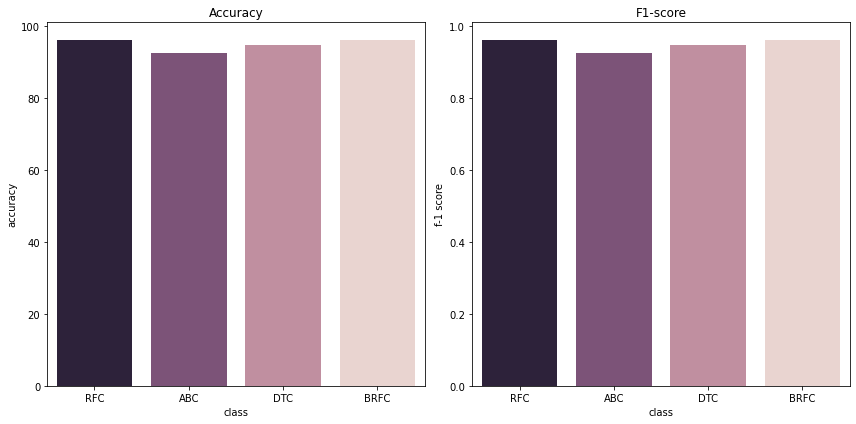

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

sns.barplot(ax=ax1, x="class", y="accuracy", data=oh,
            palette=sns.cubehelix_palette(n_colors=4, reverse=True))

ax1.set_title("Accuracy")


sns.barplot(ax=ax2, x="class", y="f-1 score", data=oh,
            palette=sns.cubehelix_palette(n_colors=4, reverse=True))

ax2.set_title('F1-score')

plt.tight_layout()

## Conclusion
 We have made the data analyzing for the airline passenger satisfaction with 103904 train rows, 25893 test rows and 23 columns. Firstly, we cleaned the initial dataset. Moreover, it was found that our dataset is balanced. Then we did feature selection via the random forest classifier and it`s function feature_importances. We have provided several types of classification models, like forest random classifier, ada boost classifier, decision tree classifier and balanced random forest classifier. According to the confusion matrixes, we found out that our dataset and prediction models are giving excellent results due to the high precision and recall. To sum up, in this situation the most accurate prediction model is random forest classifier.